In [ ]:

import numpy as np

#code for extracting the features(i.e. colour indices/astronomical colours) out of SDSS numpy file which returns the subsequent galaxy which posses that feature. 
def get_features_targets(data):
    features = np.zeros((data.shape[0], 4))
    features[: , 0] = data['u'] - data['g']
    features[: , 1] = data['g'] - data['r']
    features[: , 2] = data['r'] - data['i']
    features[: , 3] = data['i'] - data['z']
    
    targets= data['redshift']
    return features, targets

data = np.load('sdss_galaxy_colors_ML dataset.npy')
  
features, targets = get_features_targets(data)
    
print(features[:2]) # returns the features  
print(targets[:2]) #and redshift of the first 2 galaxies !




[[0.31476 0.0571  0.28991 0.07192]
 [1.2002  0.82026 0.45294 0.24665]]
[0.539301  0.1645703]


In [ ]:
#actualDecisiontreeclassifier
from sklearn.tree import DecisionTreeRegressor
dtr= DecisionTreeRegressor()
# train the model
dtr.fit(features, targets)
# make predictions using the same features
predictions = dtr.predict(features)
# print out the first 4 predicted redshifts
print(predictions[:4])

np.save('predictions.npy', predictions)
np.save('targets.npy', targets)

[0.539301   0.1645703  0.04190006 0.04427702]


The trained model now predicts redshifts using the same input features (no train/test split here — you're just checking the model's output on training data itself to check if it is giving similar results to the numpy dataset.)



In [ ]:
#calculating the median of the predicted and actual values to test the accuracy of model where the training and test data are same,there is no split

import numpy as np

def median_difference(predicted , actual) :
  return np.median(np.abs(predicted[:]- actual[:]))

#loading the params for the function (i.e. loading testing data)
predictions= np.load('predictions.npy')
actual= np.load('targets.npy')

diff = median_difference(predictions , targets)

print("accuracy(median difference):{:0.3f}".format(diff))

accuracy(median difference):0.000


#means the predicitons are same as that of target values , the model memorized the data. For accuracy to show , it should work on the unseen data.

import pandas as pd #when train_test split and other datasets will be used!

df = pd.read_csv('your_dataset.csv')  # or use astropy.table for FITS
features = df[['modelMag_u', 'modelMag_g', 'modelMag_r', 'modelMag_i', 'modelMag_z']].values
targets = df['redshift'].values

In [ ]:
#train and test split 
import numpy as np
from sklearn.tree import DecisionTreeRegressor

def get_features_targets(data):
    features = np.zeros((data.shape[0], 4))
    features[: , 0] = data['u'] - data['g']
    features[: , 1] = data['g'] - data['r']
    features[: , 2] = data['r'] - data['i']
    features[: , 3] = data['i'] - data['z']
    
    targets= data['redshift']
    return features, targets

data = np.load('sdss_galaxy_colors_ML dataset.npy')
     
features, targets = get_features_targets(data)
    

#calculating median for accuracy
def median_difference(predicted , actual) :
  return np.median(np.abs(predicted[:]- actual[:]))

def validate_model(model, features, targets):
  # split the data into training and testing features and predictions
  split = 2*features.shape[0]//3
  train_features, test_features = features[:split], features[split:] #(two thirds for training and remaining for testing)
  train_targets, test_targets = targets[:split], targets[split:]
 
  model.fit(train_features , train_targets)

  # getting the predicted_redshifts
  predictions= model.predict(test_features)
  return median_difference(test_targets , predictions)
 

dtr = DecisionTreeRegressor()

# validate the model and print the med_diff
diff = validate_model(dtr, features, targets)
print('Median difference: {:f}'.format(diff))

Median difference: 0.021703


#median difference for highly skewed error distribution.

Solution by regression: By constructing an empirical model to predict how the dependent variable (redshift) varies with one or more independent variables (the colour indices). 

Problem: Complex functions to handle. Multi-variate non-linear regression model - Complex model - dampened inverse sine function a good starting point. No gurantee of accurate results. 

Another Approach : a colour-index vs colour-index plot using an additional colour scale to show redshift. (Combination of Color indices) Following are the challenges!

| Type                     | Description                                                |
| ------------------------ | ---------------------------------------------------------- |
| **Degeneracy**           | Same colours -  multiple possible redshifts                 |
| **Photometric noise**    | Measurement errors in magnitudes - redshift errors         |
| **Sparse training data** | Poorly populated regions - bad interpolation               |
| **Modeling limitations** | Assumptions in SED fitting or templates may not be perfect |
| **Galaxy diversity**     | Intrinsic colour variation among galaxies                  |


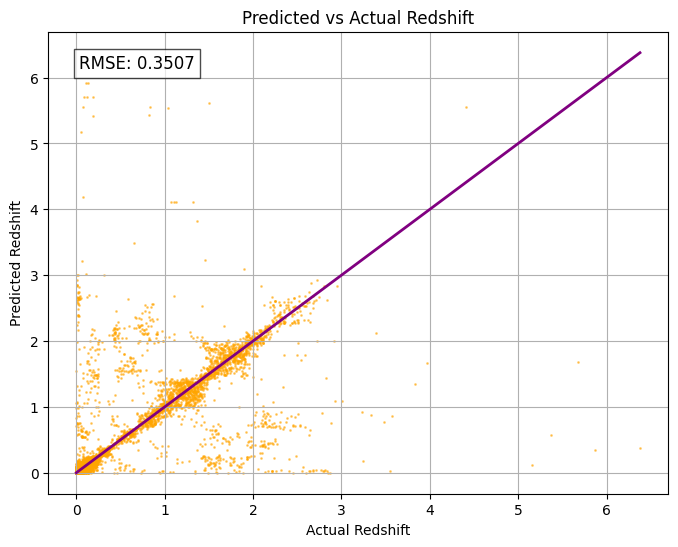

In [ ]:
# plot for the actual and predicted redshifts based on the model trained

from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()


def validate_model(model, features, targets):
  # split the data into training and testing features and predictions
  split = 2*features.shape[0]//3
  train_features, test_features = features[:split], features[split:] #(two thirds for training and remaining for testing)
  train_targets, test_targets = targets[:split], targets[split:]
 
  model.fit(train_features , train_targets)

  # get the predicted_redshifts
  predictions= model.predict(test_features)
  
  return predictions , test_targets
# get predictions and actuals
predicted, actual = validate_model(dtr, features, targets)


from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(actual, predicted))  # Calculate RMSE


import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(actual, predicted, s=1, alpha=0.5, color='orange')
plt.plot([min(actual), max(actual)], [min(actual), max(actual)], color='purple', lw=2)  # 1:1 line
plt.xlabel('Actual Redshift')
plt.ylabel('Predicted Redshift')
plt.title('Predicted vs Actual Redshift')
plt.grid(True)

plt.text(0.05, 0.95, f'RMSE: {rmse:.4f}', transform=plt.gca().transAxes,
fontsize=12, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.7))

plt.show()


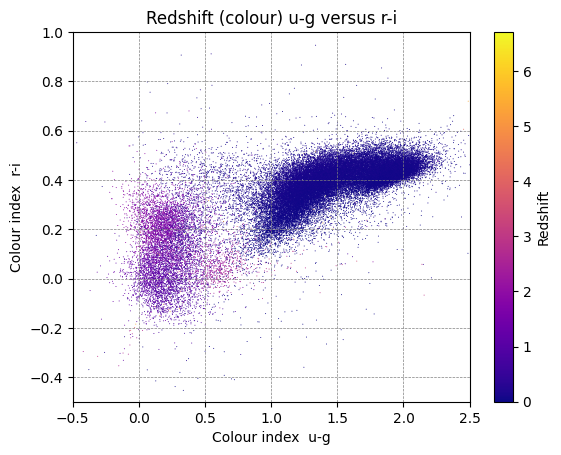

In [ ]:
#A simple multicolor indices plot
import numpy as np
from matplotlib import pyplot as plt

data = np.load('sdss_galaxy_colors_ML dataset.npy')
cmap = plt.get_cmap('plasma') #supplied colormap from matplotlib
  
# Define our any colour indexes u-g and r-i for the required map
u_g = data['u'] - data['g']
r_i = data['r'] - data['i']

# Make a redshift array
redshift = data['redshift']

plot = plt.scatter(u_g, r_i, s=0.5, lw=0, c=redshift, cmap=cmap) #c= color values assigned to each point according to its redshift!
cb = plt.colorbar(plot) 
cb.set_label('Redshift') 

plt.xlabel('Colour index  u-g')
plt.ylabel('Colour index  r-i')
plt.title('Redshift (colour) u-g versus r-i')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')
plt.xlim(-0.5, 2.5)
plt.ylim(-0.5, 1)
plt.show()

| Type            | Examples                                        | Use Case                                        |
| --------------- | ----------------------------------------------- | ----------------------------------------------- |
| **Sequential**  | `'viridis'`, `'plasma'`, `'YlGnBu'`, `'YlOrRd'` | For ordered data like temperature, redshift     |
| **Diverging**   | `'coolwarm'`, `'seismic'`, `'PiYG'`             | For highlighting deviation from a central value |
| **Cyclic**      | `'twilight'`, `'hsv'`                           | For circular data (e.g., angles)                |
| **Qualitative** | `'tab10'`, `'Set3'`, `'Pastel1'`                | For categorical data                            |


THIS WAS SIMPLY A REGRESSION CLASSIFIER !

The following snippet shows the median differences comparison of the training and testing data with the tree depth. It is a basic method of hand-out validation method. However,the med_diff that we get from one randomly sampled training set will vary to that of a different random training set of the same size.

Depth with lowest median difference : 19


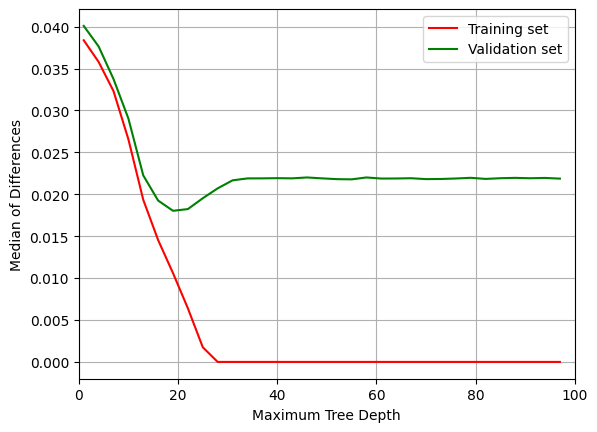

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeRegressor

#  get_features_targets function 

def get_features_targets(data):
    features = np.zeros((data.shape[0], 4))
    features[: , 0] = data['u'] - data['g']
    features[: , 1] = data['g'] - data['r']
    features[: , 2] = data['r'] - data['i']
    features[: , 3] = data['i'] - data['z']
    
    targets= data['redshift']
    return features, targets

#  median_diff function 
def median_diff(predicted , actual) :
  return np.median(np.abs(predicted[:]- actual[:]))

def accuracy_by_treedepth(features, targets, depth):
 
  split = features.shape[0]//2
  train_features, test_features = features[:split], features[split:] 
  train_targets, test_targets = targets[:split], targets[split:]
  
  # initialise arrays or lists to store the accuracies for the below loop
  train_diffs = []
  test_diffs = []
  
  # loop through depths i.e. Go through each value inside the list tree_depths, and during each loop iteration
  # assign that value to the variable depth."


  for depth in tree_depths:
    # initialize model with the maximum depth. 
    dtr = DecisionTreeRegressor(max_depth=depth)

    # train the model using the training set
    dtr.fit(train_features , train_targets)

    # get the predictions for the training set and calculate their median_diff
    predictions = dtr.predict(train_features)
    train_diffs.append(median_diff(train_targets, predictions))
    # get the predictions for the testing (validation) set and calculate their median_diff
    predictions = dtr.predict(test_features)   
    test_diffs.append(median_diff(test_targets, predictions))
  # return the accuracies for the training and testing sets
  return train_diffs, test_diffs #this returns the values in the previous arrays created.

#append function: This stores all the results for plotting or comparison after the loop ends


data = np.load('sdss_galaxy_colors_ML dataset.npy')
features, targets = get_features_targets(data)

  # Generate several depths to test
tree_depths = [i for i in range(1, 100, 3)] #1 to 100 number of nodes with inclusive 99 in step of 3

  # Calling
train_med_diffs, test_med_diffs = accuracy_by_treedepth(features, targets, tree_depths) 
print("Depth with lowest median difference : {}".format(tree_depths[test_med_diffs.index(min(test_med_diffs))]))
    
  # Plot the results
train_plot = plt.plot(tree_depths, train_med_diffs, label='Training set', color= 'red')
test_plot = plt.plot(tree_depths, test_med_diffs, label='Validation set', color='green')
plt.xlabel("Maximum Tree Depth")
plt.ylabel("Median of Differences")
plt.legend()
plt.grid(True)
  

plt.show()
  


K-fold Cross validation: 
The default shuffle is set to false. It is generally good practice to shuffle the data for cross validation as sometimes during collection and storage, data of a similar type can be stored adjacently which would lead to some learning bias when training the tree. For example, if the data was sorted by redshift, on the first iteration the model might be trained with redshifts 0 to 3 and tested on galaxies with redshifts ~4. k-fold cross validation mitigates the risk that the training set has a unique or specific population of the data set; e.g. if all the training data contained QSOs and the testing set regular galaxies

In [ ]:
#using the k-fold library 
import numpy as np
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor

import numpy as np
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeRegressor


def get_features_targets(data):
    features = np.zeros((data.shape[0], 4))
    features[: , 0] = data['u'] - data['g']
    features[: , 1] = data['g'] - data['r']
    features[: , 2] = data['r'] - data['i']
    features[: , 3] = data['i'] - data['z']
    
    targets= data['redshift']
    return features, targets

#  median_diff function 
def median_diff(predicted , actual) :
  return np.median(np.abs(predicted - actual))

def cross_validate_model(model, features, targets, k):
  kf = KFold(n_splits=k, shuffle=True)

# initialise a list to collect median_diffs for each iteration of the loop below
  diffs=[]

  for train_indices, test_indices in kf.split(features):  
    train_features, test_features = features[train_indices], features[test_indices]
    train_targets, test_targets = targets[train_indices], targets[test_indices]
    
    # fit the model for the current set
    model.fit(train_features, train_targets)
    # predict using the model
    predictions = model.predict(test_features)
    # calculate the median_diff from predicted values and append to results array
    diffs.append(median_diff(predictions , test_targets))
 
  # return the list with your median difference values
  return diffs


data = np.load('sdss_galaxy_colors_ML dataset.npy')
features, targets = get_features_targets(data)

# initialize model with a maximum depth of 19
dtr = DecisionTreeRegressor(max_depth=19)

# call your cross validation function
diffs = cross_validate_model(dtr, features, targets, 20)

# Print the values
print('Differences: {}'.format(', '.join(['{:.3f}'.format(val) for val in diffs])))
print('Mean difference: {:.3f}'.format(np.mean(diffs)))


Differences: 0.018, 0.018, 0.017, 0.016, 0.017, 0.018, 0.017, 0.017, 0.017, 0.018, 0.017, 0.017, 0.017, 0.017, 0.017, 0.017, 0.018, 0.018, 0.016, 0.017
Mean difference: 0.017


The kf.split(features) is an iterator that, for each of the k iterations, returns two arrays of indices to be used with our feature and target arrays, i.e.  features[train_indices] , targets[train_indices]

Extension of the previous code, instead of median differences we can return a predicted value of every single galaxy!
And we put these values predicted in an order into a single array. The function returns a 1D array which contains the predicted values of 'M' galaxies, i.e. the total galaxies that are present in the dataset.


Median difference: 0.017


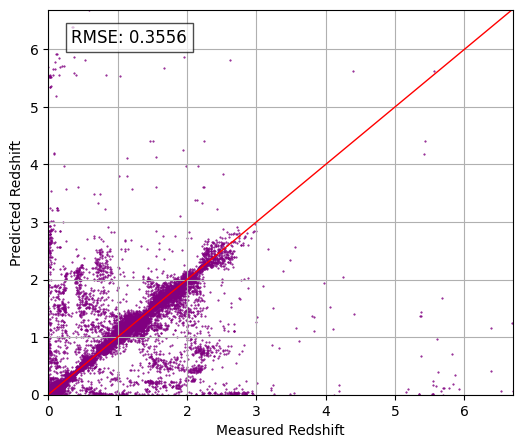

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold #contains many other off-shelf libraries as well! e.g. the cross_val_score function!
from sklearn.tree import DecisionTreeRegressor

def get_features_targets(data):
    features = np.zeros((data.shape[0], 4))
    features[: , 0] = data['u'] - data['g']
    features[: , 1] = data['g'] - data['r']
    features[: , 2] = data['r'] - data['i']
    features[: , 3] = data['i'] - data['z']
    
    targets= data['redshift']
    return features, targets
  
def median_diff(predicted , actual) :
  return np.median(np.abs(predicted - actual))

def cross_validate_predictions(model, features, targets, k):
  kf = KFold(n_splits=k, shuffle=True)

  #array declaration
  all_predictions = np.zeros_like(targets)

  for train_indices, test_indices in kf.split(features):
    
      train_features, test_features = features[train_indices] , features[test_indices]
      train_targets , test_targets = targets[train_indices], targets[test_indices]
    
      model.fit(train_features, train_targets)

      predictions = model.predict(test_features)

      all_predictions[test_indices] = predictions

  return all_predictions    



data = np.load('sdss_galaxy_colors_ML dataset.npy')
features, targets = get_features_targets(data)

dtr = DecisionTreeRegressor(max_depth=19)

predictions = cross_validate_predictions(dtr, features, targets, 20)

# calculate and print the rmsd/rmse as a sanity check
diffs = median_diff(predictions, targets)
print('Median difference: {:.3f}'.format(diffs))

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(targets, predictions)) 

plt.figure(figsize=(6,6))
plt.scatter(targets, predictions, s=0.25 , c='purple')
plt.xlim((0, targets.max()))
plt.ylim((0, predictions.max()))
plt.plot([min(actual), max(actual)], [min(actual), max(actual)], color='red', lw=1)  # 1:1 line
plt.xlabel('Measured Redshift')
plt.ylabel('Predicted Redshift') #Again a regression line
plt.grid(True)
plt.text(0.05, 0.95, f'RMSE: {rmse:.4f}', transform=plt.gca().transAxes,
fontsize=12, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.7))
plt.show()

COMPARISON WITH THE QSOs (Quasi Stellar Objects): QSOs have redshifts all the way out to z ~ 6.  Due to this contribution from the AGN, the flux magnitudes measured at different wavelengths might not follow the typical profile we assumed when predicting redshifts.

In [ ]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor

def get_features_targets(data):
    features = np.zeros((data.shape[0], 4))
    features[: , 0] = data['u'] - data['g']
    features[: , 1] = data['g'] - data['r']
    features[: , 2] = data['r'] - data['i']
    features[: , 3] = data['i'] - data['z']
    
    targets= data['redshift']
    return features, targets


def median_diff(predicted , actual) :
  return np.median(np.abs(predicted - actual))

#validation using the held-out method
def cross_validate_median_diff(data):
  features, targets = get_features_targets(data)
  dtr = DecisionTreeRegressor(max_depth=19)
  return np.mean(cross_validate_model(dtr, features, targets, 10))


#validation using the k-fold
def cross_validate_model(model, features, targets, k):
  kf = KFold(n_splits=k, shuffle=True)
  diffs = []

  for train_indices, test_indices in kf.split(features):
    
      train_features, test_features = features[train_indices] , features[test_indices]
      train_targets , test_targets = targets[train_indices], targets[test_indices]
    
 
      model.fit(train_features, train_targets)
    
      predictions = model.predict(test_features)
      diffs.append(median_diff(predictions , test_targets))

  return diffs 

# Function to split into galaxies and QSOs
def split_galaxies_qsos(data):
  galaxies = data[data['spec_class']== b'GALAXY']
  qsos = data[data['spec_class'] == b'QSO']
  # return the seperated galaxies and qsos arrays
  return galaxies , qsos

data = np.load('sdss_galaxy_colors_ML dataset.npy')

# Split the data set into galaxies and QSOs
galaxies, qsos= split_galaxies_qsos(data)

# Here we cross validate the model and get the cross-validated median difference
# The cross_validated_med_diff function is in "written_functions"
galaxy_median_diff = cross_validate_median_diff(galaxies)
qso_median_diff = cross_validate_median_diff(qsos)

print("Median difference for Galaxies: {:.3f}".format(galaxy_median_diff))
print("Median difference for QSOs: {:.3f}".format(qso_median_diff))


Median difference for Galaxies: 0.016
Median difference for QSOs: 0.074


Unique Approaches : 

1.Masking : The inner data['spec_class'] == b'GALAXY' returns all of the indices that have a galaxy spectral type. These indices are then used to select the rows with the outer data[...]!

2.The spectral class is stored as a byte string (not Unicode strings), so the literals must have a b out the front. Comparing against 'GALAXY' will not match any rows, whereas b'GALAXY' will. The saved dataset doesn't contains regular text/strings! When you load your dataset with np.load, it’s likely saved in a NumPy structured array or a .npy file that includes binary-encoded data.

The probable reason for such a high difference in residuals is : 

1.There are far fewer QSOs (8525) than galaxies (41,475).

2.Galaxies aren't as bright as QSOs so they become too faint to be detected with SDSS at redshifts 
  ≈ 0.4. This creates a measurement bias.

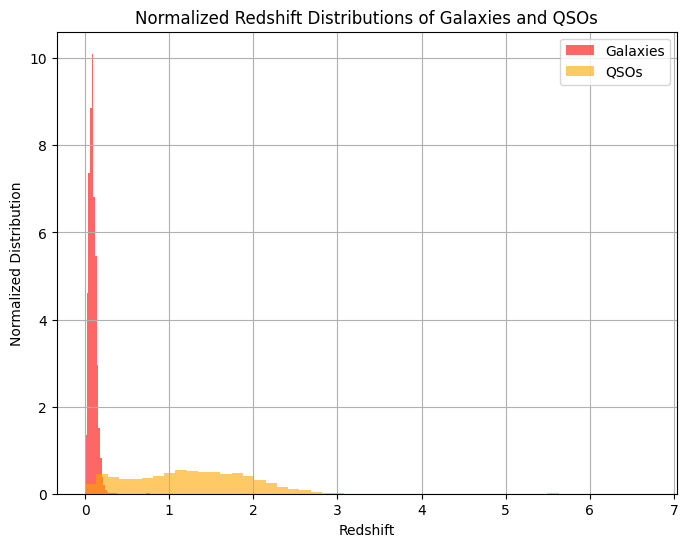

Galaxy Peak redshift0.088
QSO Peak Redshift1.140


In [ ]:
#population distribution
import numpy as np
import matplotlib.pyplot as plt

data = np.load('sdss_galaxy_colors_ML dataset.npy')


def split_galaxies_qsos(data):
    galaxies = data[data['spec_class'] == b'GALAXY']
    qsos = data[data['spec_class'] == b'QSO']
    return galaxies, qsos

# Split the data
galaxies, qsos = split_galaxies_qsos(data)

# Get redshifts
galaxy_redshifts = galaxies['redshift']
qso_redshifts = qsos['redshift']

plt.figure(figsize=(8, 6))

# Plot for galaxies
plt.hist(galaxy_redshifts, bins=50, density=True, alpha=0.6, label='Galaxies', color='red')

# Plot for QSOs
plt.hist(qso_redshifts, bins=50, density=True, alpha=0.6, label='QSOs', color='orange')

plt.xlabel('Redshift')
plt.ylabel('Normalized Distribution')
plt.title('Normalized Redshift Distributions of Galaxies and QSOs')
plt.legend()
plt.grid(True)
plt.show()

#calculating the highest residual value
# Compute histograms with density=True for normalization
gal_counts, gal_bins = np.histogram(galaxy_redshifts, bins=50, density=True)
qso_counts, qso_bins = np.histogram(qso_redshifts, bins=50, density=True)

# Find peak bin (maximum density value) for each
gal_peak_index = np.argmax(gal_counts)
qso_peak_index = np.argmax(qso_counts)

# Find corresponding bin centers for peak
gal_peak_redshift = 0.5 * (gal_bins[gal_peak_index] + gal_bins[gal_peak_index + 1])
qso_peak_redshift = 0.5 * (qso_bins[qso_peak_index] + qso_bins[qso_peak_index + 1])

print(f"Galaxy Peak redshift{gal_peak_redshift:.3f}")
print(f"QSO Peak Redshift{qso_peak_redshift:.3f}")


We can see that the majority of galaxies form a peak around 0.10 while the QSOs are resonably evenly distributed out to redshift ≈2.5. This can lead to a measurement bias. In the case of the galaxies we have trained our decision tree with target redshifts approximately less than 0.4. As such ,  the predictions from this model will not be larger than the maximum target value. So the maximum difference (or residual) for each galaxy in this set will be a lot smaller than the maximum residual for the QSOs.

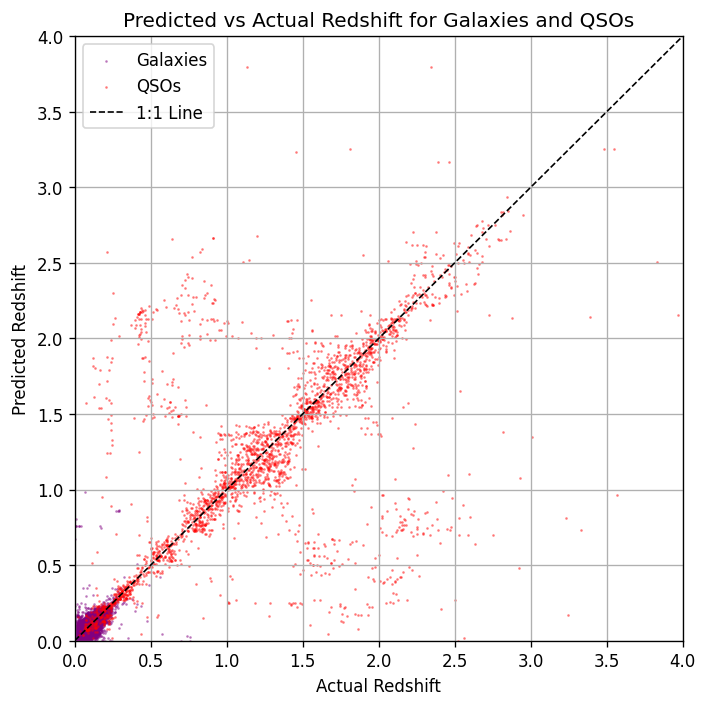

In [ ]:
# plot for the actual and predicted redshifts based on the model trained
#  initialize model
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()

data = np.load('sdss_galaxy_colors_ML dataset.npy')

def get_features_targets(data):
    features = np.zeros((data.shape[0], 4))
    features[: , 0] = data['u'] - data['g']
    features[: , 1] = data['g'] - data['r']
    features[: , 2] = data['r'] - data['i']
    features[: , 3] = data['i'] - data['z']
    
    targets= data['redshift']
    return features, targets

def split_galaxies_qsos(data):
    galaxies = data[data['spec_class'] == b'GALAXY']
    qsos = data[data['spec_class'] == b'QSO']
    return galaxies, qsos

# Split the data
galaxies, qsos = split_galaxies_qsos(data)

#For the dataset containing galaxies 
def validate_model(model, features, targets):
  
  split = 2*features.shape[0]//3
  train_features, test_features = features[:split], features[split:] 
  train_targets, test_targets = targets[:split], targets[split:]
  # train the model
  model.fit(train_features , train_targets)

  # get the predicted_redshifts
  predictions= model.predict(test_features)
  
  return predictions , test_targets

# Galaxy model prediction
gal_features, gal_targets = get_features_targets(galaxies)
dtr_gal = DecisionTreeRegressor()
gal_predictions, gal_actuals = validate_model(dtr_gal, gal_features, gal_targets)

# QSO model prediction
qso_features, qso_targets = get_features_targets(qsos)
dtr_qso = DecisionTreeRegressor()
qso_predictions, qso_actuals = validate_model(dtr_qso, qso_features, qso_targets)

# Plot both on the same figure
plt.figure(figsize=(6, 6), dpi=120)
plt.scatter(gal_actuals, gal_predictions, s=0.3, alpha=0.5, label='Galaxies', color='purple')
plt.scatter(qso_actuals, qso_predictions, s=0.3, alpha=0.5, label='QSOs', color='red')
plt.plot([min(data['redshift']), max(data['redshift'])],
         [min(data['redshift']), max(data['redshift'])],
         color='black', linestyle='--', linewidth=1, label='1:1 Line')

plt.xlim(0, 4)
plt.ylim(0, 4)

plt.xlabel('Actual Redshift')
plt.ylabel('Predicted Redshift')
plt.title('Predicted vs Actual Redshift for Galaxies and QSOs')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
